Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
16/16 [=

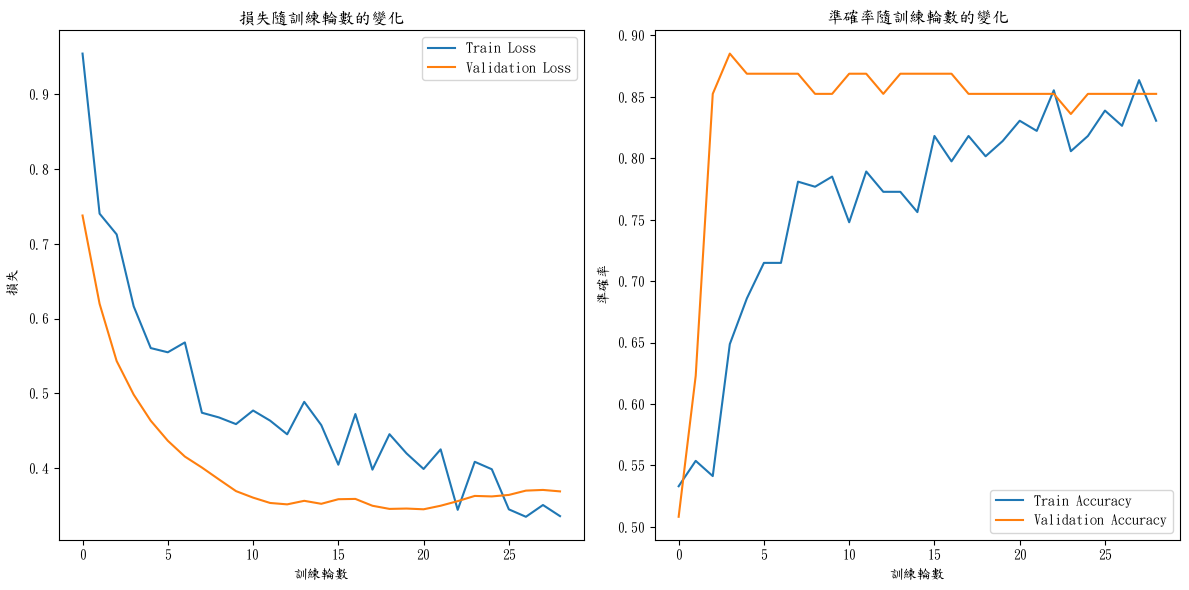

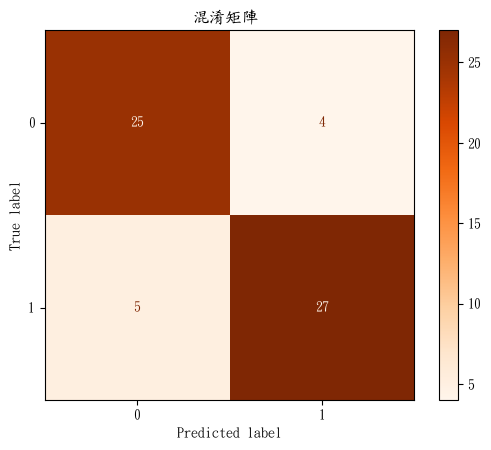


Statistics for Numerical Features:

     Feature  Overall Mean  Overall Median  Overall Std  False Positive Mean  \
0        age     -0.052170        0.058483     0.933085            -0.213687   
1        sex      0.273561        0.722504     0.862661             0.722504   
2         cp     -0.120424       -0.971891     1.041901             0.498094   
3   trestbps      0.373932        0.276318     1.149069             1.318353   
4       chol     -0.054583       -0.034980     0.906504             0.002980   
5        fbs      0.303438       -0.383301     1.258277             0.364754   
6    restecg     -0.240858       -1.046109     0.934283            -0.101488   
7    thalach     -0.104402       -0.094848     1.115510             0.230174   
8      exang      0.135735       -0.676632     1.044192            -0.137997   
9    oldpeak      0.119094       -0.375556     1.238684            -0.648210   
10     slope     -0.181398       -0.694988     1.057325             0.129459   
11 

C:\Users\Hung Shih-pei\AppData\Local\Temp\ipykernel_10564\1258562414.py:155: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(false_positive_samples[:, i], label='假陽性', color='red', fill=True, alpha=0.3)
C:\Users\Hung Shih-pei\AppData\Local\Temp\ipykernel_10564\1258562414.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(false_negative_samples[:, i], label='假陰性', color='green', fill=True, alpha=0.3)
C:\Users\Hung Shih-pei\AppData\Local\Temp\ipykernel_10564\1258562414.py:157: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(false_negative_samples[:, i], label='假陰性', color='green', fill=True, alpha=0.3)
C:\Users\Hung Shih-pei\AppData\Local\Temp\ipykernel_10564\1258562414.py:155: UserWarning: Dataset has 0 variance; skipping density estimate. 

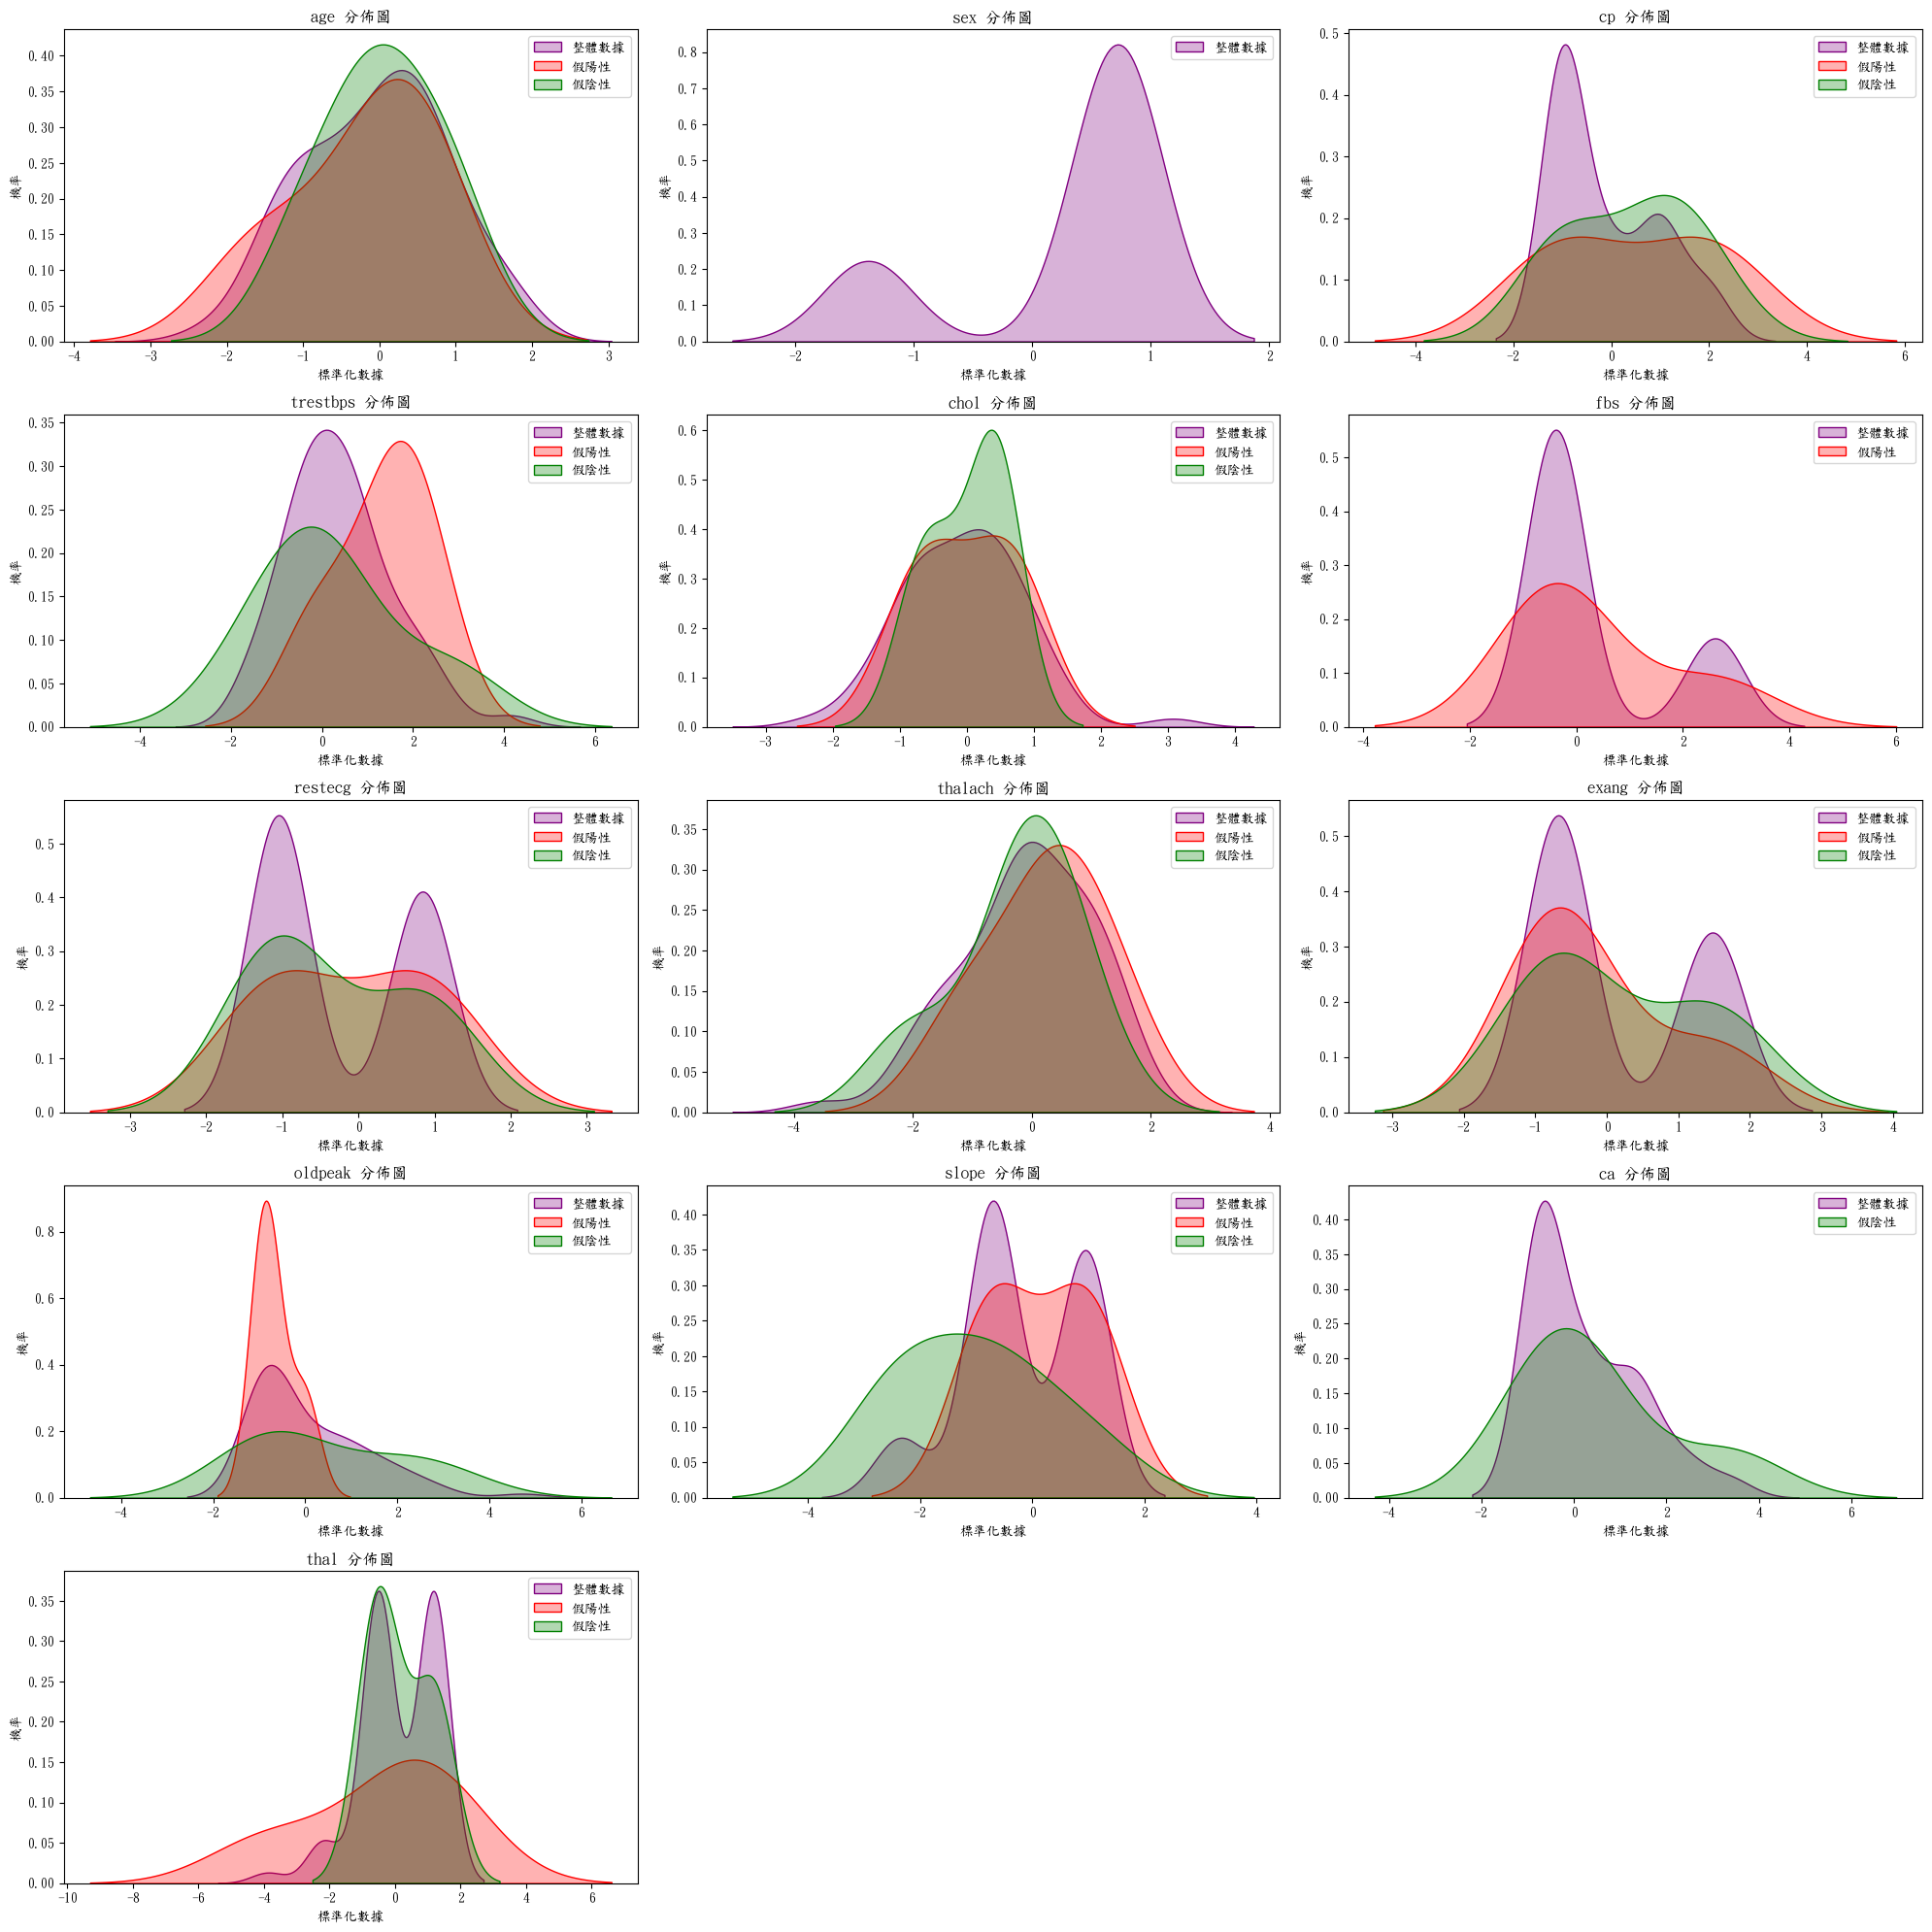

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams


data = pd.read_csv('heart.csv')

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
 
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',     
    patience=10,         
    min_delta=0.001,       
    restore_best_weights=True  
)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    batch_size=16,
                    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

rcParams['font.sans-serif'] = ['DFKai-SB']  
rcParams['axes.unicode_minus'] = False  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('損失隨訓練輪數的變化')
plt.xlabel('訓練輪數')
plt.ylabel('損失')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('準確率隨訓練輪數的變化')
plt.xlabel('訓練輪數')
plt.ylabel('準確率')
plt.legend()

plt.tight_layout()
plt.show()

cm_lr = confusion_matrix(y_test, y_pred)
cmd_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=np.unique(y_test))
cmd_lr.plot(cmap='Oranges')
plt.title('混淆矩陣 ')
plt.show()

false_positives = np.where((y_pred.ravel() == 1) & (y_test.ravel() == 0))[0]
false_negatives = np.where((y_pred.ravel() == 0) & (y_test.ravel() == 1))[0]
false_positive_samples = X_test[false_positives]
false_negative_samples = X_test[false_negatives]
overall_samples = X_test

feature_names = data.drop(columns=['target']).columns
statistics = []

for i, feature in enumerate(feature_names):
    overall_mean = np.mean(overall_samples[:, i])
    overall_median = np.median(overall_samples[:, i])
    overall_std = np.std(overall_samples[:, i])

    if false_positive_samples.shape[0] > 0:
        false_positive_mean = np.mean(false_positive_samples[:, i])
        false_positive_median = np.median(false_positive_samples[:, i])
        false_positive_std = np.std(false_positive_samples[:, i])
    else:
        false_positive_mean, false_positive_median, false_positive_std = np.nan, np.nan, np.nan

    if false_negative_samples.shape[0] > 0:
        false_negative_mean = np.mean(false_negative_samples[:, i])
        false_negative_median = np.median(false_negative_samples[:, i])
        false_negative_std = np.std(false_negative_samples[:, i])
    else:
        false_negative_mean, false_negative_median, false_negative_std = np.nan, np.nan, np.nan

    statistics.append({
        'Feature': feature,
        'Overall Mean': overall_mean,
        'Overall Median': overall_median,
        'Overall Std': overall_std,
        'False Positive Mean': false_positive_mean,
        'False Positive Median': false_positive_median,
        'False Positive Std': false_positive_std,
        'False Negative Mean': false_negative_mean,
        'False Negative Median': false_negative_median,
        'False Negative Std': false_negative_std
    })

stats_df = pd.DataFrame(statistics)
print("\nStatistics for Numerical Features:\n")
print(stats_df)
plt.figure(figsize=(20, 20))


for i, feature in enumerate(feature_names):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(overall_samples[:, i], label='整體數據', color='blue', fill=True, alpha=0.3)
    if false_positive_samples.shape[0] > 0:
        sns.kdeplot(false_positive_samples[:, i], label='假陽性', color='red', fill=True, alpha=0.3)
    if false_negative_samples.shape[0] > 0:
        sns.kdeplot(false_negative_samples[:, i], label='假陰性', color='green', fill=True, alpha=0.3)
    plt.title(f'{feature} 分佈圖')
    plt.xlabel('標準化數據')
    plt.ylabel('機率')
    plt.legend()

plt.tight_layout()
plt.show()

